In [30]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing 
from keras import losses, optimizers
import pandas as pn
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
data = pn.read_csv('pd.csv')

In [32]:
y1 = data[['motor_UPDRS', 'total_UPDRS']]
x1 = data.drop(['motor_UPDRS', 'total_UPDRS'], axis=1)

y = pn.DataFrame.as_matrix(y1)
x = pn.DataFrame.as_matrix(x1)

In [33]:
epochs = 10

In [34]:
x, x.shape

(array([[  1.     ,  72.     ,   0.     , ...,   0.41888,   0.54842,
           0.16006],
        [  1.     ,  72.     ,   0.     , ...,   0.43493,   0.56477,
           0.1081 ],
        [  1.     ,  72.     ,   0.     , ...,   0.46222,   0.54405,
           0.21014],
        ..., 
        [ 42.     ,  61.     ,   0.     , ...,   0.47792,   0.57888,
           0.14157],
        [ 42.     ,  61.     ,   0.     , ...,   0.56865,   0.56327,
           0.14204],
        [ 42.     ,  61.     ,   0.     , ...,   0.58608,   0.57077,
           0.15336]]), (5875, 20))

In [35]:
y, y.shape

(array([[ 28.199,  34.398],
        [ 28.447,  34.894],
        [ 28.695,  35.389],
        ..., 
        [ 21.495,  32.495],
        [ 21.007,  32.007],
        [ 20.513,  31.513]]), (5875, 2))

In [36]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.33, random_state = 1)

In [37]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
x_train.shape, y_train.shape

((3936, 20), (3936, 2))

In [39]:
x_test.shape, y_test.shape

((1939, 20), (1939, 2))

In [40]:
model = Sequential()
# model.add(Dense(units=130, input_shape =(22,)))
# model.add(Activation(activation='relu'))
# model.add(Dense(units=40) )
# model.add(Activation(activation='relu'))
# model.add(Dense(units=1))
model.add(Dense(30, activation='sigmoid', input_dim=20))
#model.add(Dense(65, activation='sigmoid'))
#model.add(Dense(20, activation='softmax'))
model.add(Dense(units=2))

In [41]:
# number_of_classes = np.unique(y_train).shape[0]
# number_of_classes

In [42]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 62        
Total params: 692
Trainable params: 692
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.33)


Train on 2637 samples, validate on 1299 samples
Epoch 1/10
2637/2637 [==============================] - 0s - loss: 374.9929 - acc: 0.9340 - val_loss: 132.7217 - val_acc: 0.5420
Epoch 2/10
2637/2637 [==============================] - 0s - loss: 111.2090 - acc: 0.5442 - val_loss: 81.4644 - val_acc: 0.6574
Epoch 3/10
2637/2637 [==============================] - 0s - loss: 76.0956 - acc: 0.8328 - val_loss: 63.2026 - val_acc: 0.7883
Epoch 4/10
2637/2637 [==============================] - 0s - loss: 61.1664 - acc: 0.7835 - val_loss: 59.5773 - val_acc: 0.9438
Epoch 5/10
2637/2637 [==============================] - 0s - loss: 53.2338 - acc: 0.9151 - val_loss: 45.3866 - val_acc: 0.8591
Epoch 6/10
2637/2637 [==============================] - 0s - loss: 44.4320 - acc: 0.8866 - val_loss: 48.1690 - val_acc: 0.9469
Epoch 7/10
2637/2637 [==============================] - 0s - loss: 43.6278 - acc: 0.8809 - val_loss: 45.5829 - val_acc: 0.8037
Epoch 8/10
2637/2637 [==============================] - 0s -

In [45]:
# y_pred = model.predict(x_test)

In [46]:
evaluation = model.evaluate(x_test, y_test)

  32/1939 [..............................] - ETA: 0s

In [47]:
# y_pred

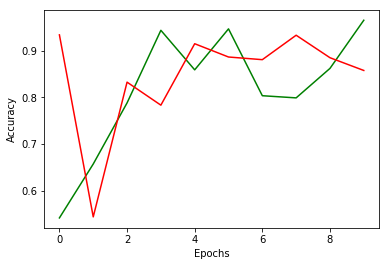

In [48]:
train_accuracy= history.history['acc']
train_loss = history.history['loss']
validation_accuracy = history.history['val_acc']
validation_loss = history.history['val_loss']
epochs = history.epoch
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(epochs, validation_accuracy, c='green')
plt.plot(epochs, train_accuracy, c='red')

Downloading/unpacking keras
  Running setup.py (path:/tmp/pip-build-t1oAEq/keras/setup.py) egg_info for package keras
    
Downloading/unpacking theano (from keras)
  Running setup.py (path:/tmp/pip-build-t1oAEq/theano/setup.py) egg_info for package theano
    
    
Downloading/unpacking pyyaml (from keras)
  Running setup.py (path:/tmp/pip-build-t1oAEq/pyyaml/setup.py) egg_info for package pyyaml
    
Downloading/unpacking six (from keras)
Downloading/unpacking numpy>=1.9.1 (from theano->keras)
  Running setup.py (path:/tmp/pip-build-t1oAEq/numpy/setup.py) egg_info for package numpy
    Running from numpy source directory.
    /usr/lib/python2.7/distutils/dist.py:267: UserWarning: Unknown distribution option: 'python_requires'
      warnings.warn(msg)
    
Downloading/unpacking scipy>=0.14 (from theano->keras)
  Running setup.py (path:/tmp/pip-build-t1oAEq/scipy/setup.py) egg_info for package scipy
    
    no previously-included directories found matching 'benchmarks/env'
    no prev

  Could not find a version that satisfies the requirement google.protobuf (from versions: )
No matching distribution found for google.protobuf
